<a href="https://colab.research.google.com/github/ba88052/Ximending/blob/main/Ximen_business_district.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import常用套件與版本
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy
import sklearn
import requests
import re
from sklearn.model_selection import cross_val_score
import wordcloud
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
import jieba

def count_word_num(df, column):
    words = []
    words = df[column].apply(lambda x: list(jieba.cut(str(x), HMM=True)))
    chi_stopword = ['!',',','.','?','-s','-ly','>','<','</s>','s', '-', "+", "_", "-", "[","]", "/", "(", ")", "*", "–", " ", "＊", "【" , "】", "（", "）"]
    words = words.apply(lambda x: [word for word in x if word not in chi_stopword])
    word_count = {}
    for line in words:
        for word in line:
            if word in word_count :
                word_count[word] = word_count[word]+1
            else:
                word_count[word] = 1
    return word_count

!wget https://github.com/odek53r/Data-Science-Camp/raw/main/SourceHanSerifK-Light.otf
def make_wordcloud_dict(dic, name="NO"):
    wordcloud = WordCloud(
            background_color = 'black',
            font_path = './SourceHanSerifK-Light.otf', # 放入中文字型檔路徑
            colormap="tab20c",
            width = 1600,
            height = 800,
            margin = 2)
    # wordcloud 套件 Input 需放入詞頻統計的 dict 型態變數
    wordcloud = wordcloud.generate_from_frequencies(dic) 
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    if name != "NO":
        plt.savefig(name)    
    plt.show()
    

def df_for_model(df):
    df["avg_price"] = (df["item_min_price"]+df["item_max_price"])/2
    if "is_cola" in list(df.columns):
        df = df[["store_name", "item_name", "avg_price",  "is_cola"]]
    else:
        df = df[["store_name", "item_name", "avg_price"]]
    store = []
    for i in df["store_name"].tolist():
        company = re.sub(r"有限公司.*$", "",str(i))
        company = re.sub(r"股份.*$", "",company)
        store.append(company)
    df["store_name"] = store
    
    test_count = count_word_num(test_df, "item_name")
    test_items = list(test_count.keys())
    for item in test_items:
        df[item] = 0
    df = df.set_index("item_name")
    for l in df.index[:]:
        for i in df.columns[4:]:
            if i in l:
                df.loc[l, i] = 1
    df = pd.get_dummies(df, columns = ["store_name"], drop_first=True)   
    return df

def search_for(product_name, dataframe):
    product_re = re.compile(fr"{product_name}")
    ans_df = dataframe[[l != None for l in [product_re.search(i) for i in dataframe["item_name"]]]]
    return ans_df

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath


def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

def start_plot(figsize=(10, 8), style = 'whitegrid'):
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1,1)
    plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax

--2022-09-16 04:29:40--  https://github.com/odek53r/Data-Science-Camp/raw/main/SourceHanSerifK-Light.otf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/odek53r/Data-Science-Camp/main/SourceHanSerifK-Light.otf [following]
--2022-09-16 04:29:40--  https://raw.githubusercontent.com/odek53r/Data-Science-Camp/main/SourceHanSerifK-Light.otf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23420516 (22M) [application/octet-stream]
Saving to: ‘SourceHanSerifK-Light.otf.1’

SourceHanSerifK-Lig 100%[===================>]  22.33M   138MB/s    in 0.2s    

2022-09-16 04:29:41 (138 MB/s) - ‘SourceHanSerifK-L

#獲取資料

In [ ]:
df = pd.read_csv('https://data.taipei/api/frontstage/tpeod/dataset/resource.download?rid=eb481f58-1238-4cff-8caa-fa7bb20cb4f4')

#每月出站人數存成csv

In [ ]:
def get_year_data(year):
    ayear = []
    for i in range(1, 13):
        if i >9:
            ayear.append(int(str(year)+str(i)))
        else:
            ayear.append(int(str(year)+"0"+str(i)))
    df_ayear = df[df["年月"].isin(ayear)]
    df_ayear.reset_index(inplace = True, drop = True)
    return df_ayear

df2019 = get_year_data(2019)
df2021 = get_year_data(2021)
df2022 = get_year_data(2022)

In [ ]:
df = pd.read_csv(df2019.資料路徑[0])

In [ ]:
set(df.出站)

{'BL板橋',
 '七張',
 '三和國中',
 '三民高中',
 '三重',
 '三重國小',
 '中山',
 '中山國中',
 '中山國小',
 '中正紀念堂',
 '丹鳳',
 '亞東醫院',
 '信義安和',
 '先嗇宮',
 '內湖',
 '公館',
 '六張犁',
 '劍南路',
 '劍潭',
 '動物園',
 '北投',
 '北門',
 '南京三民',
 '南京復興',
 '南勢角',
 '南港',
 '南港展覽館',
 '南港軟體園區',
 '古亭',
 '台北101/世貿',
 '台北小巨蛋',
 '台北橋',
 '台北車站',
 '台大醫院',
 '台電大樓',
 '唭哩岸',
 '善導寺',
 '國父紀念館',
 '圓山',
 '土城',
 '士林',
 '大坪林',
 '大安',
 '大安森林公園',
 '大橋頭站',
 '大湖公園',
 '大直',
 '奇岩',
 '小南門',
 '小碧潭',
 '市政府',
 '府中',
 '後山埤',
 '徐匯中學',
 '復興崗',
 '忠孝復興',
 '忠孝敦化',
 '忠孝新生',
 '忠義',
 '文德',
 '新北投',
 '新埔',
 '新店',
 '新店區公所',
 '新莊',
 '昆陽',
 '明德',
 '景安',
 '景美',
 '木柵',
 '東湖',
 '東門',
 '松山',
 '松山機場',
 '松江南京',
 '民權西路',
 '永安市場',
 '永寧',
 '永春',
 '江子翠',
 '海山',
 '淡水',
 '港墘',
 '石牌',
 '科技大樓',
 '竹圍',
 '紅樹林',
 '芝山',
 '菜寮',
 '萬芳社區',
 '萬芳醫院',
 '萬隆',
 '葫洲',
 '蘆洲',
 '行天宮',
 '西湖',
 '西門',
 '象山',
 '輔大',
 '辛亥',
 '迴龍',
 '關渡',
 '雙連',
 '頂埔',
 '頂溪',
 '頭前庄',
 '麟光',
 '龍山寺'}

In [ ]:
outstation = ["台北101", "忠孝復興", "忠孝敦化", "BL板橋", "台北車站", "西門"]
outstation = "台北101/世貿"
station ="台北101"
peopleflow_2022 = []
for i in df2022.資料路徑:
    df2022tem = pd.read_csv(i)
    peopleflow_2022.append(df2022tem[df2022tem["出站"] == outstation].sum()["人次"])

df_station = pd.read_csv(f"{station}.csv", index_col = 0)
df_station["2022"] = peopleflow_2022+[0, 0, 0, 0]
df_station.to_csv(f"{station}.csv")


In [ ]:
df_station

,2019,2021,2022
1,1224451,762540,631130
2,1047546,682345,565221
3,1080320,763838,712190
4,979592,779555,531690
5,1109439,397355,403878
6,947450,133928,508515
7,1130486,208617,717508
8,1161889,380308,745694
9,955116,452743,0
10,1078248,661036,0


In [ ]:
# peopleflow_2021 = []
# for i in df2021.資料路徑:
#     dftem = pd.read_csv(i)
#     peopleflow_2021.append(dftem[dftem["出站"] == station].sum()["人次"])

In [ ]:
# df_station = pd.DataFrame(index = range(1, 13), columns = ["2019", "2021"])
# df_station['2019'] = peopleflow_2019
# df_station["2021"] = peopleflow_2021
# df_station.to_csv(f"{station}.csv")
# df_station

In [ ]:
x = [1,2,3]
y=[3,4,5]
x+y

[1, 2, 3, 3, 4, 5]

In [ ]:
station =["台北101/世貿", "忠孝復興", "忠孝敦化", "BL板橋", "台北車站", "西門"]
peopleflow_2022 = []
for i in df2022.資料路徑:
    dftem = pd.read_csv(i)
    peopleflow_2022.append(dftem[dftem["出站"] == station].sum()["人次"])

In [ ]:
df2022

,年月,資料路徑
0,202201,http://tcgmetro.blob.core.windows.net/stationo...
1,202202,http://tcgmetro.blob.core.windows.net/stationo...
2,202203,http://tcgmetro.blob.core.windows.net/stationo...
3,202204,http://tcgmetro.blob.core.windows.net/stationo...
4,202205,http://tcgmetro.blob.core.windows.net/stationo...
5,202206,http://tcgmetro.blob.core.windows.net/stationo...
6,202207,http://tcgmetro.blob.core.windows.net/stationo...
7,202208,http://tcgmetro.blob.core.windows.net/stationo...


In [ ]:
outstation = ["台北101", "忠孝復興", "忠孝敦化", "BL板橋", "台北車站", "西門"]
station =["台北101/世貿", "忠孝復興", "忠孝敦化", "BL板橋", "台北車站", "西門"]
for i, l in zip(outstation, station):
    peopleflow_2022 = []
    for x in df2022.資料路徑:
        dftem = pd.read_csv(x)
        peopleflow_2022.append(dftem[dftem["出站"] == l].sum()["人次"])
    df_station = pd.read_csv(f"{i}.csv", index_col = 0)
    df_station["2022"] = peopleflow_2022+[0, 0, 0, 0]
    df_station.to_csv(f"{i}.csv")

ConnectionResetError: ignored

#以圖片呈現

In [ ]:
outstation = ["台北101", "忠孝復興", "忠孝敦化", "BL板橋", "台北車站", "西門"]
title = ["101","Zhongxiao Fuxing", "Zhongxiao Dunhua", "Banqiao", "Taipei Station", "Ximen" ]
for i, l in zip(outstation, title):
    df_station = pd.read_csv(f"{i}.csv", index_col = 0)
    ax = start_plot(style='darkgrid', figsize = (12, 8))
    ax.set_xticks(ticks=range(1, 13))
    ax.set_yticks(ticks=range(1, 13))
    sns.lineplot(data = df_station, ax = ax).set(title = l)
    plt.savefig(f"{i+l}.png")

In [ ]:
outstation = ["台北101", "忠孝復興", "忠孝敦化", "BL板橋", "台北車站", "西門"]
title = ["101","Zhongxiao Fuxing", "Zhongxiao Dunhua", "Banqiao", "Taipei Station", "Ximen" ]
df = pd.DataFrame(columns = title)
for i, l in zip(outstation, title):
    df_station = pd.read_csv(f"{i}.csv", index_col = 0)
    df[l] = df_station["2022"]

df["Eastern District"] = df["Zhongxiao Fuxing"]+df["Zhongxiao Dunhua"]
df = df.drop(["Zhongxiao Fuxing", "Zhongxiao Dunhua"], axis = 1)

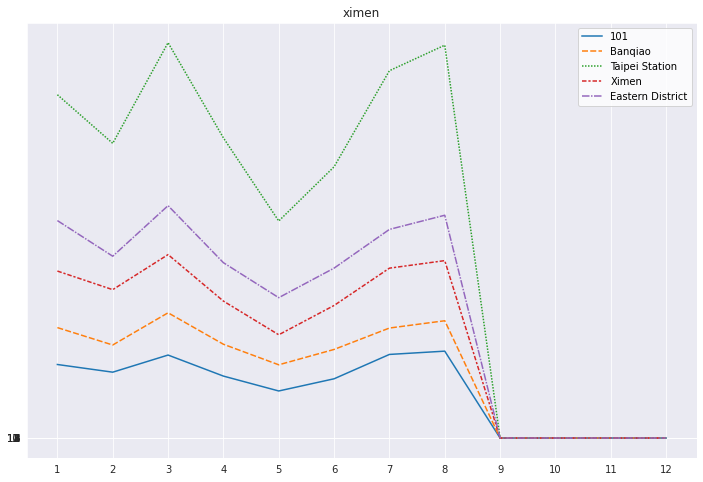

In [ ]:
ax = start_plot(style='darkgrid', figsize = (12, 8))
ax.set_xticks(ticks=range(1, 13))
ax.set_yticks(ticks=range(1, 13))
sns.lineplot(data = df, ax = ax).set(title = "ximen")
plt.savefig("test.png")